In [1]:
import pandas as pd
import numpy as np
from common import *
from glob import glob
from os import rename, path
from gensim import corpora
from os.path import basename, splitext

from matplotlib import pyplot as plt
import logging, json

from tqdm import tqdm

import gensim
from gensim import corpora, models, similarities

DATA_FOLDER = '../data/'
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Using TensorFlow backend.


In [2]:
all_docs = get_all_docs(DATA_FOLDER)

# Load corpora

In [3]:
%%time
dictionary = corpora.Dictionary.load(join(DATA_FOLDER, 'fltrd_nbelow10_nabove0.3_keepn100000.dict'))
corpus = corpora.MmCorpus(join(DATA_FOLDER, 'fltrd_nbelow10_nabove0.3_keepn100000_corpus.mm'))

2017-07-20 18:44:37,709 : INFO : loading Dictionary object from ../data/fltrd_nbelow10_nabove0.3_keepn100000.dict
2017-07-20 18:44:37,769 : INFO : loaded ../data/fltrd_nbelow10_nabove0.3_keepn100000.dict
2017-07-20 18:44:37,908 : INFO : loaded corpus index from ../data/fltrd_nbelow10_nabove0.3_keepn100000_corpus.mm.index
2017-07-20 18:44:37,909 : INFO : initializing corpus reader from ../data/fltrd_nbelow10_nabove0.3_keepn100000_corpus.mm
2017-07-20 18:44:37,911 : INFO : accepted corpus with 1194429 documents, 100000 features, 182984581 non-zero entries


CPU times: user 164 ms, sys: 40 ms, total: 204 ms
Wall time: 203 ms


In [4]:
print(corpus)

MmCorpus(1194429 documents, 100000 features, 182984581 non-zero entries)


In [5]:
%%time
fmodel = join(DATA_FOLDER, 'tfidf_fltrd_nbelow10_nabove0.3_keepn100000.model')
if not path.exists(fmodel):    
    tfidf = models.TfidfModel(corpus)
    tfidf.save(fmodel)
else:
    tfidf = models.TfidfModel.load(fmodel)

2017-07-20 18:44:37,926 : INFO : collecting document frequencies
2017-07-20 18:44:37,929 : INFO : PROGRESS: processing document #0
2017-07-20 18:44:45,282 : INFO : PROGRESS: processing document #10000
2017-07-20 18:44:52,596 : INFO : PROGRESS: processing document #20000
2017-07-20 18:44:59,948 : INFO : PROGRESS: processing document #30000
2017-07-20 18:45:07,141 : INFO : PROGRESS: processing document #40000
2017-07-20 18:45:14,241 : INFO : PROGRESS: processing document #50000
2017-07-20 18:45:21,276 : INFO : PROGRESS: processing document #60000
2017-07-20 18:45:28,383 : INFO : PROGRESS: processing document #70000
2017-07-20 18:45:35,627 : INFO : PROGRESS: processing document #80000
2017-07-20 18:45:42,794 : INFO : PROGRESS: processing document #90000
2017-07-20 18:45:50,206 : INFO : PROGRESS: processing document #100000
2017-07-20 18:45:57,476 : INFO : PROGRESS: processing document #110000
2017-07-20 18:46:04,855 : INFO : PROGRESS: processing document #120000
2017-07-20 18:46:12,342 : 

2017-07-20 18:52:47,596 : INFO : PROGRESS: processing document #1150000
2017-07-20 18:52:48,522 : INFO : PROGRESS: processing document #1160000
2017-07-20 18:52:49,452 : INFO : PROGRESS: processing document #1170000
2017-07-20 18:52:50,371 : INFO : PROGRESS: processing document #1180000
2017-07-20 18:52:51,305 : INFO : PROGRESS: processing document #1190000
2017-07-20 18:52:53,395 : INFO : calculating IDF weights for 1194429 documents and 99999 features (182984581 matrix non-zeros)
2017-07-20 18:52:53,453 : INFO : saving TfidfModel object under ../data/tfidf_fltrd_nbelow10_nabove0.3_keepn100000.model, separately None
2017-07-20 18:52:53,481 : INFO : saved ../data/tfidf_fltrd_nbelow10_nabove0.3_keepn100000.model


CPU times: user 8min 15s, sys: 1.57 s, total: 8min 16s
Wall time: 8min 15s


In [6]:
# %%time
# index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(dictionary), num_best=200)

In [7]:
fname = join(DATA_FOLDER, 'sim_index2/sim')
index = similarities.Similarity(fname, tfidf[corpus], 
                                num_features=len(dictionary), num_best=200, 
                                chunksize=10*256, shardsize=10*32768)
index.save(fname)


# index = similarities.Similarity.load(fname)

2017-07-20 18:52:53,500 : INFO : starting similarity index under ../data/sim_index2/sim
2017-07-20 18:53:06,057 : INFO : PROGRESS: fresh_shard size=10000
2017-07-20 18:53:18,627 : INFO : PROGRESS: fresh_shard size=20000
2017-07-20 18:53:30,939 : INFO : PROGRESS: fresh_shard size=30000
2017-07-20 18:53:43,176 : INFO : PROGRESS: fresh_shard size=40000
2017-07-20 18:53:55,444 : INFO : PROGRESS: fresh_shard size=50000
2017-07-20 18:54:07,675 : INFO : PROGRESS: fresh_shard size=60000
2017-07-20 18:54:20,216 : INFO : PROGRESS: fresh_shard size=70000
2017-07-20 18:54:32,510 : INFO : PROGRESS: fresh_shard size=80000
2017-07-20 18:54:45,152 : INFO : PROGRESS: fresh_shard size=90000
2017-07-20 18:54:57,764 : INFO : PROGRESS: fresh_shard size=100000
2017-07-20 18:55:10,165 : INFO : PROGRESS: fresh_shard size=110000
2017-07-20 18:55:22,591 : INFO : PROGRESS: fresh_shard size=120000
2017-07-20 18:55:34,817 : INFO : PROGRESS: fresh_shard size=130000
2017-07-20 18:55:47,205 : INFO : PROGRESS: fresh_s

2017-07-20 19:07:45,373 : INFO : PROGRESS: at document #60000/327680
2017-07-20 19:07:49,274 : INFO : PROGRESS: at document #70000/327680
2017-07-20 19:07:53,256 : INFO : PROGRESS: at document #80000/327680
2017-07-20 19:07:57,185 : INFO : PROGRESS: at document #90000/327680
2017-07-20 19:08:01,143 : INFO : PROGRESS: at document #100000/327680
2017-07-20 19:08:05,075 : INFO : PROGRESS: at document #110000/327680
2017-07-20 19:08:09,032 : INFO : PROGRESS: at document #120000/327680
2017-07-20 19:08:12,940 : INFO : PROGRESS: at document #130000/327680
2017-07-20 19:08:16,856 : INFO : PROGRESS: at document #140000/327680
2017-07-20 19:08:20,783 : INFO : PROGRESS: at document #150000/327680
2017-07-20 19:08:24,693 : INFO : PROGRESS: at document #160000/327680
2017-07-20 19:08:28,661 : INFO : PROGRESS: at document #170000/327680
2017-07-20 19:08:32,518 : INFO : PROGRESS: at document #180000/327680
2017-07-20 19:08:36,382 : INFO : PROGRESS: at document #190000/327680
2017-07-20 19:08:40,401 

2017-07-20 19:12:02,005 : INFO : PROGRESS: fresh_shard size=0
2017-07-20 19:12:06,617 : INFO : PROGRESS: fresh_shard size=10000
2017-07-20 19:12:11,213 : INFO : PROGRESS: fresh_shard size=20000
2017-07-20 19:12:15,879 : INFO : PROGRESS: fresh_shard size=30000
2017-07-20 19:12:20,481 : INFO : PROGRESS: fresh_shard size=40000
2017-07-20 19:12:25,102 : INFO : PROGRESS: fresh_shard size=50000
2017-07-20 19:12:33,698 : INFO : PROGRESS: fresh_shard size=60000
2017-07-20 19:12:43,223 : INFO : PROGRESS: fresh_shard size=70000
2017-07-20 19:12:47,790 : INFO : PROGRESS: fresh_shard size=80000
2017-07-20 19:12:51,877 : INFO : PROGRESS: fresh_shard size=90000
2017-07-20 19:12:55,972 : INFO : PROGRESS: fresh_shard size=100000
2017-07-20 19:12:59,964 : INFO : PROGRESS: fresh_shard size=110000
2017-07-20 19:13:03,968 : INFO : PROGRESS: fresh_shard size=120000
2017-07-20 19:13:07,986 : INFO : PROGRESS: fresh_shard size=130000
2017-07-20 19:13:12,051 : INFO : PROGRESS: fresh_shard size=140000
2017-07-2

# Validate

In [8]:
with open(join(DATA_FOLDER, 'gold.json'), 'r') as f:
    gold = json.load(f)

In [9]:
val_docs = glob(join(DATA_FOLDER, 'validate/*.txt'))

In [10]:
preds = {}
for fname in tqdm(val_docs):
    with open(fname, 'r') as f:
        doc_text = f.read()
    vec_bow = dictionary.doc2bow(tokenize(doc_text))
    vec_model = tfidf[vec_bow] # convert the query to model space
    preds[splitext(basename(fname))[0]] = index[vec_model]

100%|██████████| 130/130 [01:40<00:00,  1.23it/s]


In [11]:
new_pred = {}
for k, v in preds.items():
    new_pred[k] = [splitext(basename(all_docs[key]))[0] for key, sim in v]

In [12]:
# new_pred['e75dcef9-73b5-40c1-45be-33a191b6440c']

median
acc10     0.000000
acc20     0.000000
acc200    0.666667
dtype: float64
mean
acc10     0.332308
acc20     0.395128
acc200    0.588846
dtype: float64


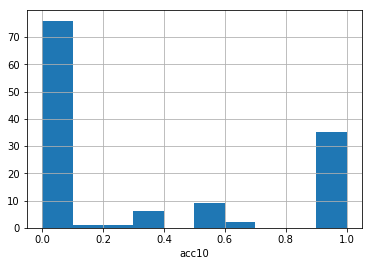

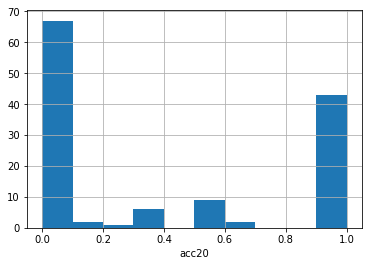

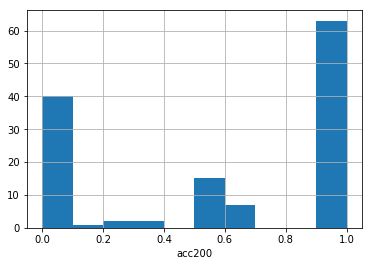

In [13]:
res = evaluate(new_pred, gold)